# Exploring the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Purpose
Many product reviews (from other platforms than Amazon) are not accompanied by a scale rating system, consisting only of a textual evaluation. In this case, it becomes daunting and time-consuming to compare different products in order to eventually make a choice between them. Therefore, models able to predict the user rating from the text review are critically important. Getting an overall sense of a textual review could in turn improve consumer experience. Also, it can help business to increase sales, and improve the product by understanding customers' needs and pain-points.

The purpose of this project is to develop models that are able to predict the user rating from the text review. While our model is built to work with any kind of product, the review dataset provided by Amazon only includes Clothing and Shoes reviews.

# Importing the Required libraries

In [2]:
import gzip
import json
import pandas as pd                                              #importing the pandas library
import numpy as np                                              #importing the numpy library
import seaborn as sns                                            #importing the library for visualisatrion
import matplotlib.pyplot as plt                                  #importing the library for visualisatrion
from tabulate import tabulate                                    #For using the table form to our data
import warnings                                                  #To avoid the shown warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing                                #For the preprocessing purpose
from sklearn.preprocessing import MinMaxScaler,StandardScaler    #for scaling the data
from sklearn.preprocessing import LabelEncoder                   # for converting the object columns to numerical one
from sklearn.preprocessing import StandardScaler                 #for scaling all the features on same scale
from sklearn.cluster import KMeans                               #for making the clusters
from sklearn.neighbors import NearestNeighbors                   #for selecting the clusters
from sklearn.metrics import silhouette_score                     #for checking the accuracy
import scipy.cluster.hierarchy as sch                            #for making the hirerchical graph to selecting the cluster
from sklearn.cluster import AgglomerativeClustering              #for making the hirerchical model
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score


from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report  

# Loading the data

In [3]:
app=[]
with gzip.open("/content/drive/MyDrive/Musical_Instruments_5.json.gz",'rb') as file:
    for i in file:
        app.append(json.loads(i.strip()))

In [4]:
df=pd.DataFrame.from_dict(app)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN


# sample review:

"reviewerID": "A3FO5AKVTFRCRJ",  
"asin": "0739079891",  
"reviewerName": "francisco",  
  
"reviewText": "It's good for beginners",  
"overall": 5.0,  
"summary": "Five Stars",  
"unixReviewTime": 1252800000,  
"reviewTime": "09 13, 2009"

# Shape of Data

In [5]:
df.shape

(231392, 12)

# Columns of Data

In [6]:
 df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

# Information and Summary of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231392 entries, 0 to 231391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         231392 non-null  float64
 1   verified        231392 non-null  bool   
 2   reviewTime      231392 non-null  object 
 3   reviewerID      231392 non-null  object 
 4   asin            231392 non-null  object 
 5   reviewerName    231367 non-null  object 
 6   reviewText      231344 non-null  object 
 7   summary         231341 non-null  object 
 8   unixReviewTime  231392 non-null  int64  
 9   vote            34777 non-null   object 
 10  style           121310 non-null  object 
 11  image           3889 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 19.6+ MB


In [8]:
 df.describe()

,overall,unixReviewTime
count,231392.000000,2.313920e+05
mean,4.470448,1.437232e+09
std,0.981586,5.726610e+07
min,1.000000,1.067299e+09
25%,4.000000,1.405901e+09
50%,5.000000,1.443830e+09
75%,5.000000,1.480550e+09
max,5.000000,1.538093e+09


 From the above dataset we can see the characteristics(summary) of the coulumns of our dataset

# Loading the Metadata

In [9]:
meta=[]
with gzip.open("/content/drive/MyDrive/meta_Musical_Instruments.json.gz",'rb') as mfile:
    for i in mfile:
        meta.append(json.loads(i.strip()))

In [10]:
df1=pd.DataFrame.from_dict(meta)
df1

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Musical Instruments, Drums & Percussion, Hand...",,[Cricket Rubbing the spine with the wooden sti...,,Wooden Percussion 2 Piece Set of 3 Inch Cricke...,"[B00NP8GYVS, B00NP80XMO, B00NP8M098]",,WADSUWAN SHOP,"[Wood percussion, Owl whistle*, Includes woode...","[>#141,729 in Musical Instruments (See Top 100...",[],Musical Instruments,,"December 2, 2013",,0000989983,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Musical Instruments, Drums & Percussion, Hand...",,[Frog - Rubbing its spine with the wooden stic...,,"Wooden Percussion 3 Piece Set Frog, Cricket an...","[B00NP8GYVS, B00NP80XMO, B01MY48HK5, B00AZZ1AJ...",,WADSUWAN SHOP,"[Wood percussion, Small 3 inches, Creates orig...","[>#1,622 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"December 2, 2013",$0.91,0000098906,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Musical Instruments, Instrument Accessories, ...",,[Vivaldi's famous set of four violin concertos...,,Hal Leonard Vivaldi Four Seasons for Piano (Or...,[],,Hal Leonard,"[., ., .]","[>#330,653 in Musical Instruments (See Top 100...",[],Musical Instruments,,"May 10, 2011",$62.93,0041291905,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,[],,"[The Turn of the Screw (op. 54) vocal score, p...",,The Turn of the Screw (vocal score),"[0486266842, 0793507669, 0393008789, 142341280...",,Boosey &amp; Hawkes,[],"[>#86,354 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"May 23, 2007",$107.79,0060015500,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,[],,[],,Suite for Organ (including the Trumpet Volunta...,[],,,[],"[>#482,025 in Musical Instruments (See Top 100...",[],Musical Instruments,,"February 8, 2013",,0193757710,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120305,"[Musical Instruments, Amplifiers & Effects, Gu...",,[This packages includes:<br> <br> 10 pcs 3pdt ...,,10 pcs 3pdt Stomp Footswitch incl PCB incl met...,[],,3pdt,[5 pcs 9 Pole Footswitch for True Bypass Switc...,"[>#23,334 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"June 25, 2016",$7.99,B01HJDOF2Y,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
120306,"[Musical Instruments, Amplifiers & Effects, Gu...",,[This packages includes:<br> <br> 5 pcs 3pdt T...,,"5 pcs 3pdt Stomp Footswitch incl. PCB, metal w...","[B015334J9G, B01L6GU858, B003HLW14W, B012CF181...",,3pdt,[5 pcs 9 Pole Footswitch for True Bypass Switc...,"[>#40,026 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"June 25, 2016",$0.91,B01HJDJ1PA,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
120307,"[Musical Instruments, Drums & Percussion, Hand...",,[These high quality clear crystal singing bowl...,,Optical Clear Quartz Crystal Singing Bowl Note...,[],,Crystal Energy Bowls,[High quality clear crystal singing bowl is wi...,"[>#481,984 in Musical Instruments (See Top 100...",[],Musical Instruments,,"June 25, 2016",,B01HJEFFTK,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
120308,"[Musical Instruments, Drums & Percussion, Hand...",,[Frog - Rubbing its spine with the wooden stic...,,2x Deluxe Small 2&quot; Wood Frog Guiro Rasp -...,[],,RA,"[Wood percussion, Small 2 inches, Packs of 2 P...","[>#76,917 in Musical Instruments (See Top 100 ...","[B00NP80XMO, B00NP8GYVS, 0000098906, B0149IWDS...",Musical Instruments,"class=""a-bordered a-horizontal-strip

# Shape of MetaData

In [11]:
df1.shape

(120310, 19)

Here we can see that our Digital_Music_5 dataset have 74347 rows and 19 columns

# Columns of MetaData

In [12]:
 df1.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

# Information and Summary of Metadata

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120310 entries, 0 to 120309
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         120310 non-null  object
 1   tech1            120310 non-null  object
 2   description      120310 non-null  object
 3   fit              120310 non-null  object
 4   title            120310 non-null  object
 5   also_buy         120310 non-null  object
 6   tech2            120310 non-null  object
 7   brand            120310 non-null  object
 8   feature          120310 non-null  object
 9   rank             120310 non-null  object
 10  also_view        120310 non-null  object
 11  main_cat         120310 non-null  object
 12  similar_item     120310 non-null  object
 13  date             120310 non-null  object
 14  price            120310 non-null  object
 15  asin             120310 non-null  object
 16  imageURL         120310 non-null  object
 17  imageURLHi

# NOW WE WILL MERGE BOTH DATASETS TO 1 FOR FURTHER ANALYSIS 

In [14]:
data=pd.merge(df,df1,on='asin')

In [15]:
data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286806,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,...,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
286807,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,...,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
286808,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,...,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-ama

# Shape of MData

In [16]:
data.shape

(286811, 30)

# Columns of MData

In [17]:
 data.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes', 'details'],
      dtype='object')

# Information and Summary of Mdata

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286811 entries, 0 to 286810
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          286811 non-null  float64
 1   verified         286811 non-null  bool   
 2   reviewTime       286811 non-null  object 
 3   reviewerID       286811 non-null  object 
 4   asin             286811 non-null  object 
 5   reviewerName     286777 non-null  object 
 6   reviewText       286745 non-null  object 
 7   summary          286749 non-null  object 
 8   unixReviewTime   286811 non-null  int64  
 9   vote             40654 non-null   object 
 10  style            156225 non-null  object 
 11  image            4413 non-null    object 
 12  category         286811 non-null  object 
 13  tech1            286811 non-null  object 
 14  description      286811 non-null  object 
 15  fit              286811 non-null  object 
 16  title            286811 non-null  obje

# Pre-processing —— Text Normalization (Text Wrangling)

 Text normalization is defined as a process that consists of a series of steps that should be followed to wrangle, clean, and standardize textual data into a form that could be consumed by other NLP and analytics systems and applications as input.  various  techniques include cleaning text,  removing stopwords and other unnecessary terms, stemming, and lemmatization. Text normalization is also often called text cleansing or wrangling.

Below are various techniques used in the process of text normalization:

Cleaning Text....

Removing Special Characters.....


Removing Stopwords.....


# Checking the missing values in our dataset

In [19]:
 data.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName           34
reviewText             66
summary                62
unixReviewTime          0
vote               246157
style              130586
image              282398
category                0
tech1                   0
description             0
fit                     0
title                   0
also_buy                0
tech2                   0
brand                   0
feature                 0
rank                    0
also_view               0
main_cat                0
similar_item            0
date                    0
price                   0
imageURL                0
imageURLHighRes         0
details                80
dtype: int64

 Here we can see that we don have many missing value in our dataset,so the missing value treatment would be required

In [20]:
data=data.drop(columns='image')
data=data.drop(columns='vote')
data=data.drop(columns='style')
data=data.drop(columns='details')

In [21]:
data=data.dropna()

In [22]:
data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,"[Musical Instruments, Ukuleles, Mandolins &amp...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,"[Musical Instruments, Ukuleles, Mandolins &amp...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,"[Musical Instruments, Ukuleles, Mandolins &amp...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,"[Musical Instruments, Ukuleles, Mandolins &amp...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,"[Musical Instruments, Ukuleles, Mandolins &amp...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286806,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,"[Musical Instruments, Instrument Accessories, ...",...,Greenten,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
286807,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,"[Musical Instruments, Instrument Accessories, ...",...,Greenten,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://imag

In [23]:
data.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
unixReviewTime     0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

# Converting Datatypes to Relevent form

In [24]:
data['reviewTime']=pd.to_datetime(data['reviewTime'])

In [25]:
data['category']=data['category'].astype(str)

In [26]:
data.dtypes

overall                   float64
verified                     bool
reviewTime         datetime64[ns]
reviewerID                 object
asin                       object
reviewerName               object
reviewText                 object
summary                    object
unixReviewTime              int64
category                   object
tech1                      object
description                object
fit                        object
title                      object
also_buy                   object
tech2                      object
brand                      object
feature                    object
rank                       object
also_view                  object
main_cat                   object
similar_item               object
date                       object
price                      object
imageURL                   object
imageURLHighRes            object
dtype: object

# DUPLICATE VALUE TRAETMENT

In [27]:
data.duplicated(['asin','reviewText','reviewerName','unixReviewTime','reviewerID']).sum()

64802

In [28]:
data = data.drop_duplicates(subset=['asin','reviewText','reviewerName','unixReviewTime','reviewerID'], keep='first')
data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5.0,True,2016-10-30,A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,"['Musical Instruments', 'Ukuleles, Mandolins &...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5.0,True,2016-06-30,A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,"['Musical Instruments', 'Ukuleles, Mandolins &...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5.0,True,2016-05-09,A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,"['Musical Instruments', 'Ukuleles, Mandolins &...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,4.0,True,2016-04-10,A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,"['Musical Instruments', 'Ukuleles, Mandolins &...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,1.0,True,2016-02-06,A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,"['Musical Instruments', 'Ukuleles, Mandolins &...",...,Alfred Music Publishing,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286806,5.0,True,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,"['Musical Instruments', 'Instrument Accessorie...",...,Greenten,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
286807,5.0,True,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,"['Musical Instruments', 'Instrument Accessorie...",...,Greenten,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-am

# Describing the Data

In [29]:
data.describe()

,overall,unixReviewTime
count,221848.000000,2.218480e+05
mean,4.472053,1.438493e+09
std,0.980094,5.682430e+07
min,1.000000,1.067299e+09
25%,4.000000,1.407197e+09
50%,5.000000,1.445126e+09
75%,5.000000,1.481328e+09
max,5.000000,1.538093e+09


# Dropping unwanted Columns from Dataset

In [30]:
data=data.drop(['imageURL','imageURLHighRes','unixReviewTime','also_buy','tech2','similar_item'], axis=1)

In [31]:
data=data.drop(['feature','tech1','fit'], axis=1)

In [32]:
data=data.drop(['rank','date','title'], axis=1)

In [33]:
data=data.drop(['reviewerName','description'], axis=1)

In [34]:
data=data.drop(['also_view'], axis=1)

In [35]:
data['review']=data['reviewText']+data['summary']

In [36]:
data=data.drop(['reviewText','summary'], axis=1)

In [37]:
data

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review
0,5.0,True,2016-10-30,A3FO5AKVTFRCRJ,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,,It's good for beginnersFive Stars
1,5.0,True,2016-06-30,A3UCGC1DHFMBCE,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,,I recommend this starter Ukulele kit. I has e...
2,5.0,True,2016-05-09,A2S9SLRYLPGYZB,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,,G'daughter received this for Christmas present...
3,4.0,True,2016-04-10,A15RTJWPG8OKOE,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,,"According to my order history, I bought this t..."
4,1.0,True,2016-02-06,A12ET1WO3OAVU7,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,,Please pay attention better than I did to the ...
...,...,...,...,...,...,...,...,...,...,...
286806,5.0,True,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,$1.96,It's pretty great.Five Stars
286807,5.0,True,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,$1.96,Good inexpensive wiring harness. It will do th...
286808,4.0,True,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,$1.96,Easily installed and worked as expected.Four S...
286809,1.0,True,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,$1.96,The description stated they were full size pot...


Defining a function for removing the special character like '$' from the price column.

In [38]:
def text_to_currency(df,col):
    '''Returns a series of float value
    Parameters: DataFrame df, Field col'''
    
    import re
    import numpy as np
    
    for i in df[col].index:
        item = df[col][i]
        res = re.compile('(\$\d+\.\d+)').findall(item)
        if res:
            df[col][i] = float(re.sub('\$','',res[0]))
        else: 
            df[col][i] = np.nan
            
    return df[col]


converting the datatype of price column to float.

In [39]:
data['price']=text_to_currency(data,'price')
data['price']=data['price'].astype(float)

we have to analyze only the 
musical instrument

In [40]:
data['main_cat'].value_counts()

data = data[data['main_cat']=='Musical Instruments']

In [41]:
data

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review
0,5.0,True,2016-10-30,A3FO5AKVTFRCRJ,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,NaN,It's good for beginnersFive Stars
1,5.0,True,2016-06-30,A3UCGC1DHFMBCE,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,NaN,I recommend this starter Ukulele kit. I has e...
2,5.0,True,2016-05-09,A2S9SLRYLPGYZB,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,NaN,G'daughter received this for Christmas present...
3,4.0,True,2016-04-10,A15RTJWPG8OKOE,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,NaN,"According to my order history, I bought this t..."
4,1.0,True,2016-02-06,A12ET1WO3OAVU7,0739079891,"['Musical Instruments', 'Ukuleles, Mandolins &...",Alfred Music Publishing,Musical Instruments,NaN,Please pay attention better than I did to the ...
...,...,...,...,...,...,...,...,...,...,...
286806,5.0,True,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,It's pretty great.Five Stars
286807,5.0,True,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,Good inexpensive wiring harness. It will do th...
286808,4.0,True,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,Easily installed and worked as expected.Four S...
286809,1.0,True,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,The description stated they were full size pot...


In [42]:
data=data.dropna(axis=0)

In [43]:
data=data.reset_index()

In [44]:
data=data.drop(['index'], axis=1)

In [45]:
#data.to_csv("capstone project")

In [46]:
data

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,So far it works as designed but it needs ridge...
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,Didn't fit my guitar. Other than that it was ...
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,"seems simple,,,we will seeFour Stars"
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,I'm thrilled with this system for learning gui...
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,this has helped me so much in learning how to ...
...,...,...,...,...,...,...,...,...,...,...
185322,5.0,True,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,It's pretty great.Five Stars
185323,5.0,True,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,Good inexpensive wiring harness. It will do th...
185324,4.0,True,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,Easily installed and worked as expected.Four S...
185325,1.0,True,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,The description stated they were full size pot...


In [47]:
data

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,So far it works as designed but it needs ridge...
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,Didn't fit my guitar. Other than that it was ...
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,"seems simple,,,we will seeFour Stars"
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,I'm thrilled with this system for learning gui...
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,this has helped me so much in learning how to ...
...,...,...,...,...,...,...,...,...,...,...
185322,5.0,True,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,It's pretty great.Five Stars
185323,5.0,True,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,Good inexpensive wiring harness. It will do th...
185324,4.0,True,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,Easily installed and worked as expected.Four S...
185325,1.0,True,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,The description stated they were full size pot...


In [48]:
#data.to_csv('happyhappy',columns=['price','asin','overall','verified','reviewTime','category','brand'])

# Finding nunique values in Dataset

In [49]:
for i in data.columns:
    print(i,':',data[i].nunique())

overall : 5
verified : 2
reviewTime : 3772
reviewerID : 27501
asin : 7924
category : 665
brand : 1316
main_cat : 1
price : 1746
review : 159083


# LEVEL 1 Analysis

Identify the type of data in each column (categorical or numerical)?
Seperate out the categorical columns from the numerical types
These are the kinds of analysis that can be performed on categorical data

Check if the variable is Nominal or Ordinal.Check how many categories are present.Check the Mode.Check for Missing values.Think about how the missing values could be treated?What kind of graph/chart can be plotted using this data?
Note: We are analyzing only one column at a time (Univariate Analysis)

# Separating Categorical and Numerical Variables

In [50]:
# Separating out the categorical and continuous variables
def seprate_data_types(data):
    categorical = []
    continuous = []
    for column in data.columns:                # looping on the number of columns
        if data[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(data)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ------------
overall        reviewTime
verified       reviewerID
main_cat       asin
               category
               brand
               price
               review


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

# Level 1 Analysis (Univariate Analysis)

# User defined functions for level 1 analysis of categorical columns

This function will check for the following: \
Unique values \
Mode \
Sum of all the null values \
Total count of missing values

In [51]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [52]:
def num_info(col):
    print(f"The mean of the {data.columns[col]} is {data[data.columns[col]].mean()}")
    print(f"The median of the {data.columns[col]} is {data[data.columns[col]].median()}")
    print(f"The standard deviation of the {data.columns[col]} is {data[data.columns[col]].std()}")
    print(f"Number of missing values in the {data.columns[col]} is {data[data.columns[col]].isnull().sum()}")

# 1. Analysis of Overall: 

In [53]:
 info_of_cat("overall") 

Unique values in overall are: [5. 4. 1. 3. 2.]
Mode of overall is 5.0
Number of missing values in overall is 0


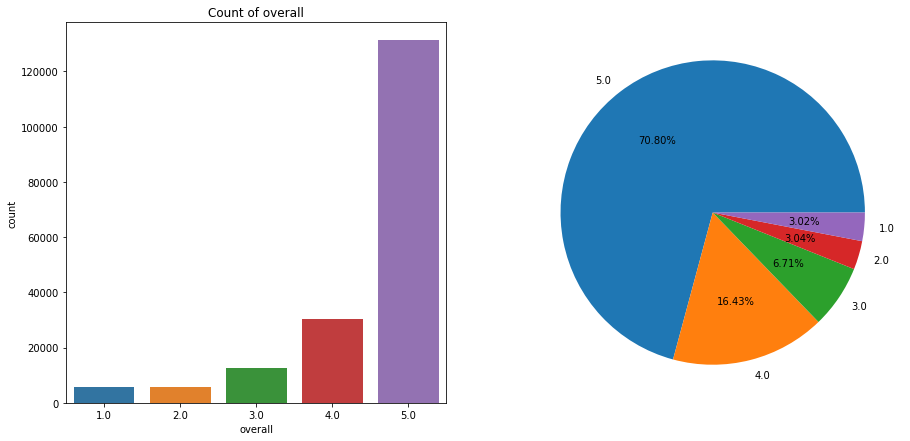

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of overall")                  # Set the title of the graph
percentage = data["overall"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["overall"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["overall"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

Interpretation: Dataset indicates that 16% of the customers left the bank while 84% of the customers are still with it.

# 2. Analysis of  Verified column: Verification of a person (YES or NO)

In [55]:
 info_of_cat("verified")

Unique values in verified are: [ True False]
Mode of verified is True
Number of missing values in verified is 0


# Visualizing Number Of Verified Reviews

Text(0.5, 1.0, 'Verified Reviews')

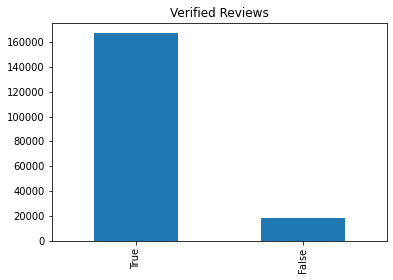

In [56]:
data['verified'].value_counts().plot(kind='bar')
plt.title('Verified Reviews')

From the graph above we can see that more numbers of reviews are verified

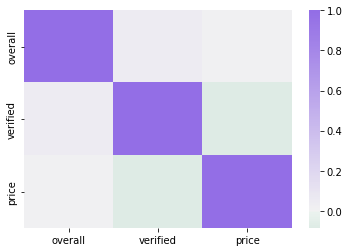

In [57]:
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(data.corr(), center=0, cmap=colors, robust=True)
plt.show()

In [58]:
df11=data.groupby(by='brand').mean()
df11

,overall,verified,price
brand,,,
,4.117021,0.957447,14.316489
1To1Music,4.531915,0.978723,8.541489
32 Key Melodica,4.777778,0.833333,0.910000
920D Custom,4.843750,0.937500,7.620625
@ Ohana,4.600000,0.400000,26.240000
...,...,...,...
wmm,4.333333,1.000000,15.990000
wonsung,4.750000,1.000000,13.990000
xGuitarx,4.677966,0.949153,11.754068


# TOP 10 BRANDS 

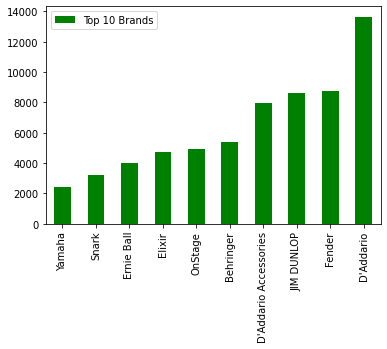

In [59]:
top=pd.DataFrame({'Top 10 Brands':(data.brand.value_counts()[:10])})
top.sort_values('Top 10 Brands').plot.bar(color='g')
plt.show()

The Most Popular Brand is D'Addario

# Finding The Top 10 Reviews

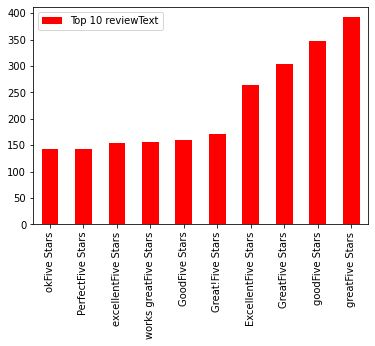

In [60]:
top=pd.DataFrame({'Top 10 reviewText':(data.review.value_counts()[:10])})
top.sort_values('Top 10 reviewText').plot.bar(color='r')
plt.show()

From the graph above we can see that maximum no of revies are for (good) and lowest are for (works great)

# Finding The Top 10 categories

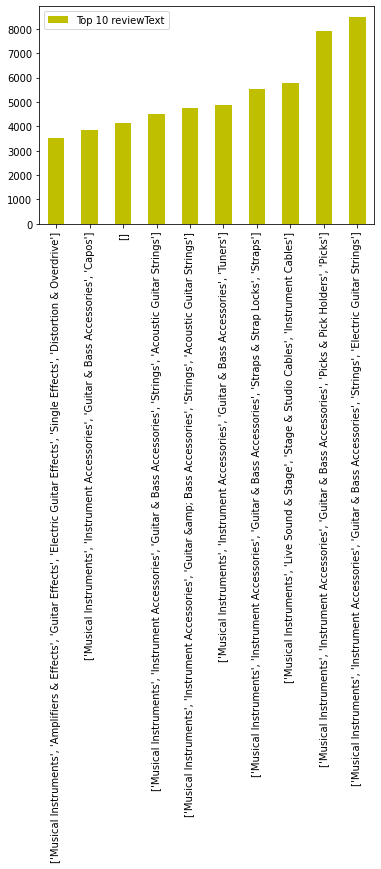

In [61]:
top=pd.DataFrame({'Top 10 reviewText':(data.category.value_counts()[:10])})
top.sort_values('Top 10 reviewText').plot.bar(color='y')
plt.show()

# Finding The Top 10 Pricest MuscialInstrument

In [62]:
# top=pd.DataFrame({'Top 10 Price':(data.price.value_counts()[:5])})
# top.sort_values('Top 10 Price').plot.bar()
# plt.show()

Top affordable Price is $0.91

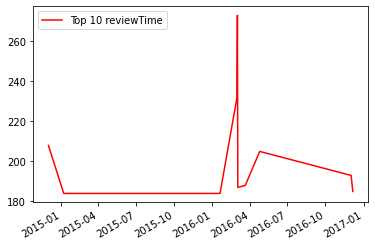

In [63]:
top3=pd.DataFrame({'Top 10 reviewTime':(data.reviewTime.value_counts()[:10])})
top3.sort_values('Top 10 reviewTime').plot.line(color='r')
plt.show()

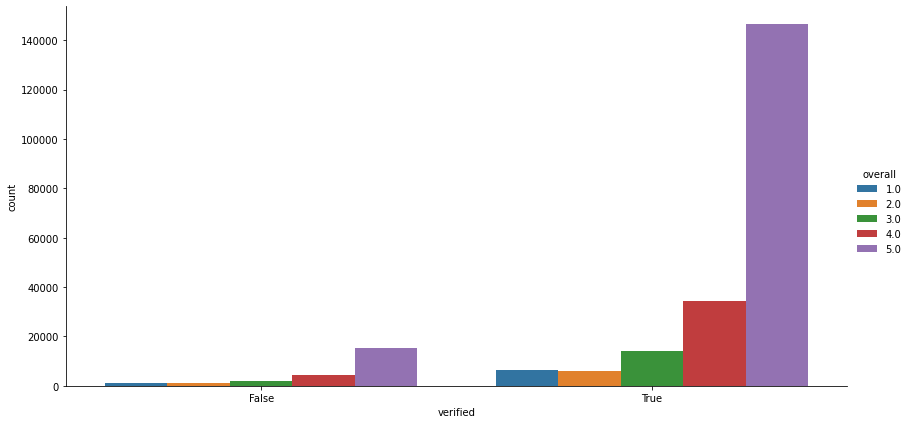

In [64]:
sns.catplot(data=df,x="verified",hue="overall",kind="count",height=6,aspect=2)

# Analysis of reviewTime

In [65]:
#num_info('reviewTime')

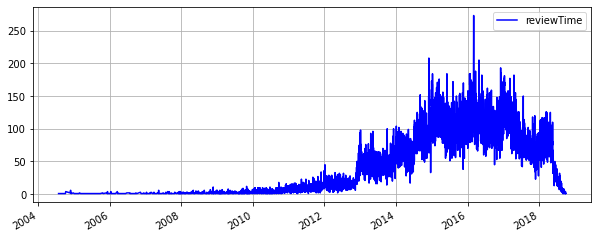

In [66]:
data['reviewTime'].value_counts().to_frame().plot(color='b',figsize=(10,4))
plt.grid()

In [67]:
data

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,So far it works as designed but it needs ridge...
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,Didn't fit my guitar. Other than that it was ...
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,"seems simple,,,we will seeFour Stars"
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,I'm thrilled with this system for learning gui...
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,this has helped me so much in learning how to ...
...,...,...,...,...,...,...,...,...,...,...
185322,5.0,True,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,It's pretty great.Five Stars
185323,5.0,True,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,Good inexpensive wiring harness. It will do th...
185324,4.0,True,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,Easily installed and worked as expected.Four S...
185325,1.0,True,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,The description stated they were full size pot...




# Sentiment Analysis

In [68]:
import re,string

# Data cleaning and removing special characters

One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML

In [69]:
def data_cleaning(t):       
    t = str(t).lower()
    t = re.sub('\[.*?\]', '', t)
    t = re.sub('https?://\S+|www\.\S+', '', t)
    t = re.sub('<.*?>+', '', t)
    t = re.sub('[%s]' % re.escape(string.punctuation), '', t)
    t = re.sub('\n', '', t)
    t = re.sub('\w*\d\w*', '', t)
    return t


In [70]:
data['review']=data['review'].apply(lambda x:data_cleaning(x))

In [71]:
data.review

0         so far it works as designed but it needs ridge...
1         didnt fit my guitar  other than that it was ok...
2                         seems simplewe will seefour stars
3         im thrilled with this system for learning guit...
4         this has helped me so much in learning how to ...
                                ...                        
185322                           its pretty greatfive stars
185323    good inexpensive wiring harness it will do the...
185324    easily installed and worked as expectedfour stars
185325    the description stated they were full size pot...
185326    they are dime size not full size pots but its ...
Name: review, Length: 185327, dtype: object

# Removing stop words

Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords

In [72]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
spacy_stopwords=spacy.lang.en.stop_words.STOP_WORDS

In [73]:
spacy_stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

some stop words like enough,good,five can be the expression of the customers and can be in the postive side of the reviews

In [74]:
spacy_stopwords=spacy_stopwords-{"not",'still','nothing',"n't",'empty','enough','cannot', 'could','good','except','bad','five','star','pretty','better','poor','must','most','does', 'although'}

In [75]:
data['review']=data['review'].apply(lambda x: ' '.join([i for i in x.split() if i not in spacy_stopwords]))

In [76]:
data['review']

0         far works designed needs ridges help develope ...
1                       didnt fit guitar okdidnt fit guitar
2                                    simplewe seefour stars
3         im thrilled system learning guitar ive wanted ...
4                helped learning play chords easefour stars
                                ...                        
185322                               pretty greatfive stars
185323        good inexpensive wiring harness jobfive stars
185324           easily installed worked expectedfour stars
185325    description stated size pots not sent backnot ...
185326    dime size not size pots nicely constructed har...
Name: review, Length: 185327, dtype: object

In [77]:
 def text_process(review):
     """
    Takes in a string of text, then perform the following:
    1. Remove all punctuations
    2. Remove all stopwords
    3. Return a list of cleaned text
    """
     # Check characters to see if they are in punctuation
     nopunc = [char for char in review if char not in string.punctuation]
    
    # Join the characters again to form the string
     nopunc = ''.join(nopunc)

In [78]:
df=data.copy()

In [79]:
df

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars
...,...,...,...,...,...,...,...,...,...,...
185322,5.0,True,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,pretty greatfive stars
185323,5.0,True,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,good inexpensive wiring harness jobfive stars
185324,4.0,True,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,easily installed worked expectedfour stars
185325,1.0,True,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,description stated size pots not sent backnot ...


In [80]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars


# Sentiment distribution

In [81]:
def sentimeny(f):
    if f['overall'] < 3 :
        value = 'Negative'
    elif f['overall'] == 3:
      value = 'Neutral'
    else:
        value = 'Positive'
    return value

In [82]:
df['sentiment'] = df.apply(sentimeny,axis=1)

In [83]:
df=df.reset_index()


In [84]:
df=df.drop(['index'], axis=1)

# Sentiment type based on overall

In [85]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,sentiment
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Positive
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Neutral
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Positive
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Positive
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Positive


In [86]:
df

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,sentiment
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Positive
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Neutral
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Positive
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Positive
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Positive
...,...,...,...,...,...,...,...,...,...,...,...
185322,5.0,True,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,pretty greatfive stars,Positive
185323,5.0,True,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,good inexpensive wiring harness jobfive stars,Positive
185324,4.0,True,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,easily installed worked expectedfour stars,Positive
185325,1.0,True,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,"['Musical Instruments', 'Instrument Accessorie...",Greenten,Musical Instruments,1.96,description stated size pots not sent backnot ...,Negative


# Sentiment distribution among reviews

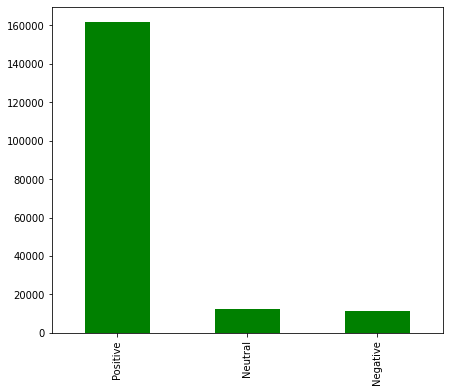

In [87]:
df['sentiment'].value_counts().plot(kind='bar',figsize=(7,6),color='g')

More positive reviews overall throughout the years - unbalanced data distribution

Since the polar values are always sensitive- considering only positive and negative reviews

In [88]:
df_pos = df[df['sentiment']=='Positive']
df_neg = df[df['sentiment']=='Negative']

print('Positive reviews:',df_pos.shape)
print('Negative reviews:',df_neg.shape)

Positive reviews: (161657, 11)
Negative reviews: (11228, 11)


# CLASSIFICATION 

# Taking measures For Our models

In [89]:
test=df.loc[:,['review','sentiment']]
test

,review,sentiment
0,far works designed needs ridges help develope ...,Positive
1,didnt fit guitar okdidnt fit guitar,Neutral
2,simplewe seefour stars,Positive
3,im thrilled system learning guitar ive wanted ...,Positive
4,helped learning play chords easefour stars,Positive
...,...,...
185322,pretty greatfive stars,Positive
185323,good inexpensive wiring harness jobfive stars,Positive
185324,easily installed worked expectedfour stars,Positive
185325,description stated size pots not sent backnot ...,Negative


# LabelEncode Our Data

In [90]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [91]:
test['sentiment']=label.fit_transform(test['sentiment'])    #sentiment column get label encoded for future predicts
test

,review,sentiment
0,far works designed needs ridges help develope ...,2
1,didnt fit guitar okdidnt fit guitar,1
2,simplewe seefour stars,2
3,im thrilled system learning guitar ive wanted ...,2
4,helped learning play chords easefour stars,2
...,...,...
185322,pretty greatfive stars,2
185323,good inexpensive wiring harness jobfive stars,2
185324,easily installed worked expectedfour stars,2
185325,description stated size pots not sent backnot ...,0


# Spliting Our Data Into Training & Split test

In [92]:
from sklearn.model_selection import train_test_split


In [93]:
X=test['review']               
y=test['sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=85)  #splitting data into 30:70 ratio 

In [94]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(129728,) (55599,) (129728,) (55599,)


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape
X_test_counts = count_vect.transform(X_test)
X_test_counts.shape
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(55599, 149508)

# MODEL1:-Naive Bayes

In [96]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()


# Importing Libraries For Model Creations

In [97]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [98]:
import spacy                                                  # Import spaCy library

from nltk.corpus import stopwords
stop_words_nltk = stopwords.words('english')                           # Load model
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import imblearn
print(imblearn.__version__)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

0.8.1


# Defining a Funct For easy Prediction

In [99]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)         #vecrorizing our data
    X_test=vectorizer.transform(input_test)
    clf=classifier.fit(X_train,label_train)              # putting the ml model
    y_pred=clf.predict(X_test)                          # prediction trough fitting the model in data 
    plot_confusion_matrix(clf,X_test,label_test)        # plotting the matrix
    print(classification_report(label_test,y_pred))      # printing classification report of our model
    print('accuracy:', accuracy_score(label_test, y_pred))             
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       1.00      0.01      0.01      3323
           1       1.00      0.03      0.07      3651
           2       0.88      1.00      0.93     48625

    accuracy                           0.88     55599
   macro avg       0.96      0.35      0.34     55599
weighted avg       0.89      0.88      0.82     55599

accuracy: 0.8772100217629814
recall: 0.8772100217629814
f1-score: 0.8223358176354953
precision: 0.8923273697652919


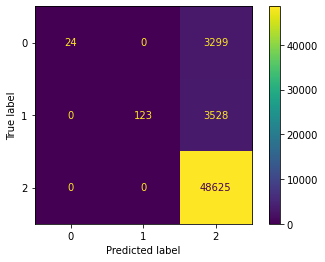

In [100]:
label_test,final,vectorizer=funct(clf,X_train,X_test,y_train,y_test)

In [101]:
durtiyrtniti

NameError: ignored

In [103]:
final.Predict.value_counts()

2    55452
1      123
0       24
Name: Predict, dtype: int64

# Model2:-LogisticRegression

In [104]:
clf1=LogisticRegression()

In [105]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)
    X_test=vectorizer.transform(input_test)
    clf1=classifier.fit(X_train,label_train)
    y_pred=clf1.predict(X_test)
    plot_confusion_matrix(clf,X_test,label_test)
    print(classification_report(label_test,y_pred))
    print('accuracy:', accuracy_score(label_test, y_pred))
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.73      0.49      0.58      3323
           1       0.60      0.21      0.31      3651
           2       0.92      0.99      0.95     48625

    accuracy                           0.91     55599
   macro avg       0.75      0.56      0.62     55599
weighted avg       0.89      0.91      0.89     55599

accuracy: 0.9069767441860465
recall: 0.9069767441860465
f1-score: 0.889477614208318
precision: 0.8893875929222128


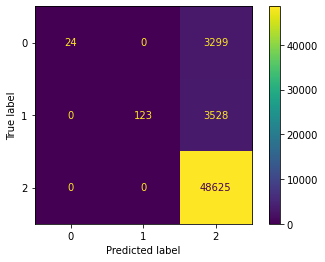

In [106]:
label_test,final,vectorizer=funct(clf1,X_train,X_test,y_train,y_test)

# Model3:- DecisionTreeClassifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier()


In [108]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)
    X_test=vectorizer.transform(input_test)
    clf2=classifier.fit(X_train,label_train)
    y_pred=clf2.predict(X_test)
    plot_confusion_matrix(clf,X_test,label_test)
    print(classification_report(label_test,y_pred))
    print('accuracy:', accuracy_score(label_test, y_pred))
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.40      0.40      0.40      3323
           1       0.30      0.25      0.28      3651
           2       0.92      0.93      0.93     48625

    accuracy                           0.86     55599
   macro avg       0.54      0.53      0.53     55599
weighted avg       0.85      0.86      0.85     55599

accuracy: 0.856400294969334
recall: 0.856400294969334
f1-score: 0.8527438354706502
precision: 0.8494176439019495


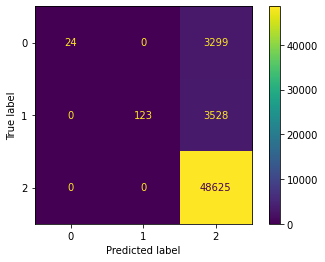

In [109]:
label_test,final,vectorizer=funct(clf2,X_train,X_test,y_train,y_test)

# Model4:- RandomForestClassifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier()


In [111]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)
    X_test=vectorizer.transform(input_test)
    clf3=classifier.fit(X_train,label_train)
    y_pred=clf3.predict(X_test)
    plot_confusion_matrix(clf,X_test,label_test)
    print(classification_report(label_test,y_pred))
    print('accuracy:', accuracy_score(label_test, y_pred))
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.75      0.22      0.34      3323
           1       0.91      0.14      0.24      3651
           2       0.90      1.00      0.94     48625

    accuracy                           0.89     55599
   macro avg       0.85      0.45      0.51     55599
weighted avg       0.89      0.89      0.86     55599

accuracy: 0.8930736164319503
recall: 0.8930736164319503
f1-score: 0.8605872662745514
precision: 0.8876875773512651


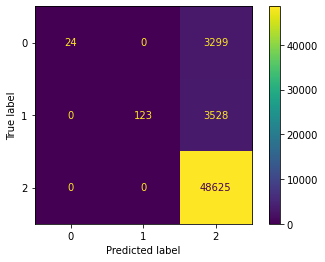

In [112]:
label_test,final,vectorizer=funct(clf3,X_train,X_test,y_train,y_test)

# Model5:- AdaBoostClassifier

In [113]:
from sklearn.ensemble import AdaBoostClassifier
clf4=AdaBoostClassifier()

In [114]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)
    X_test=vectorizer.transform(input_test)
    clf4=classifier.fit(X_train,label_train)
    y_pred=clf4.predict(X_test)
    plot_confusion_matrix(clf,X_test,label_test)
    print(classification_report(label_test,y_pred))
    print('accuracy:', accuracy_score(label_test, y_pred))
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.64      0.30      0.41      3323
           1       0.51      0.09      0.15      3651
           2       0.90      0.99      0.94     48625

    accuracy                           0.89     55599
   macro avg       0.68      0.46      0.50     55599
weighted avg       0.86      0.89      0.86     55599

accuracy: 0.8880555405672764
recall: 0.8880555405672764
f1-score: 0.8581457734290868
precision: 0.8588098867769088


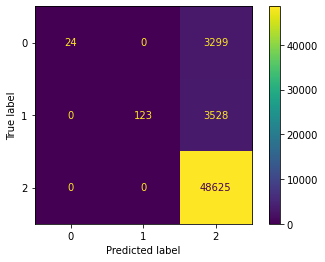

In [115]:
label_test,final,vectorizer=funct(clf4,X_train,X_test,y_train,y_test)

**COMAPARISION**

Navye Byes:-accuracy: 0.8772100217629814
       ,recall: 0.8772100217629814
       ,f1-score: 0.8223358176354953
       ,precision: 0.8923273697652919
Loggistic:-accuracy: 0.9069767441860465
`      ,recall: 0.9069767441860465
       ,f1-score: 0.889477614208318
       ,precision: 0.8893875929222128
Decision Tree:-accuracy: 0.8569398730192989
      ,recall: 0.8569398730192989
      ,f1-score: 0.8532573661870194
      ,precision: 0.849935858595231
Random Forest:-accuracy: 0.8927858414719689
,recall: 0.8927858414719689
,f1-score: 0.859930940707845
,precision: 0.8871851065562397
Ada Boast:-accuracy: 0.8880555405672764
,recall: 0.8880555405672764
,f1-score: 0.8581457734290868
,precision: 0.8588098867769088

Observation:- we get to know that the Model 2 :-LogisticRegression gives the highest values 
accuracy: 0.9069767441860465
recall: 0.9069767441860465
f1-score: 0.889477614208318
precision: 0.8893875929222128
    so,Model 2 is best fit model for our DataSet

In [116]:
btyurtutrue

NameError: ignored

# Our Previous Prediction is for ImBalace Data Now we will Predict for Balance Data

In [117]:
X=test['review']
y=test['sentiment']

In [118]:
vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
X=vectorizer.fit_transform(X) #vectorizing the x 

# Importing Smote To balance Our Datasets

In [119]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X,y=smt.fit_resample(X,y)
#splitting the data into train and test spli
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=85)

** MODEL1:-Naive Bayes**

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     48570
           1       0.82      0.97      0.89     48524
           2       0.97      0.79      0.87     48398

    accuracy                           0.90    145492
   macro avg       0.91      0.90      0.90    145492
weighted avg       0.91      0.90      0.90    145492

accuracy: 0.8992865587111318
recall: 0.8992865587111318
f1-score: 0.8988015000127976
precision: 0.9081139702275913


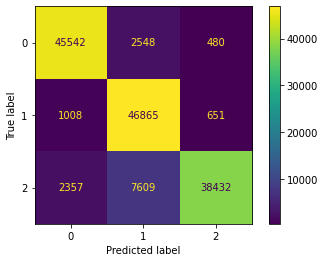

In [120]:
mul = MultinomialNB()
clf1=mul.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
plot_confusion_matrix(clf1,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))

# Model2:-LogisticRegression

In [121]:
lr=LogisticRegression()

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     48570
           1       0.88      0.92      0.90     48524
           2       0.93      0.86      0.90     48398

    accuracy                           0.91    145492
   macro avg       0.91      0.91      0.91    145492
weighted avg       0.91      0.91      0.91    145492

accuracy: 0.9084829406427845
recall: 0.9084829406427845
f1-score: 0.9082935176131418
precision: 0.9095375176588235


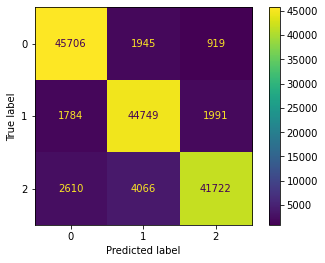

In [122]:
clf=lr.fit(X_train,y_train)
y_pred=clf.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))


# Model3:- DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     48570
           1       0.86      0.87      0.87     48524
           2       0.89      0.85      0.87     48398

    accuracy                           0.88    145492
   macro avg       0.88      0.88      0.88    145492
weighted avg       0.88      0.88      0.88    145492

accuracy: 0.8777114892915074
recall: 0.8777114892915074
f1-score: 0.8775836495106425
precision: 0.8780535282378512


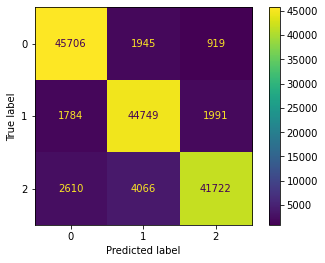

In [123]:
dtc=DecisionTreeClassifier()
clf2=dtc.fit(X_train,y_train)
y_pred=clf2.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))


# Model4:- RandomForestClassifier

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     48570
           1       0.97      0.99      0.98     48524
           2       0.99      0.95      0.97     48398

    accuracy                           0.98    145492
   macro avg       0.98      0.98      0.98    145492
weighted avg       0.98      0.98      0.98    145492

accuracy: 0.9797789569185935
recall: 0.9797789569185935
f1-score: 0.9796990728918976
precision: 0.9799615842592377


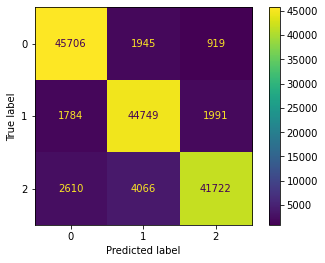

In [124]:
rfc=RandomForestClassifier()
clf3=rfc.fit(X_train,y_train)
y_pred=clf3.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))


# Model5:- AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.65      0.73      0.69     48570
           1       0.63      0.55      0.59     48524
           2       0.70      0.71      0.71     48398

    accuracy                           0.66    145492
   macro avg       0.66      0.66      0.66    145492
weighted avg       0.66      0.66      0.66    145492

accuracy: 0.6627924559425947
recall: 0.6627924559425947
f1-score: 0.6604988647303149
precision: 0.6615292203531358


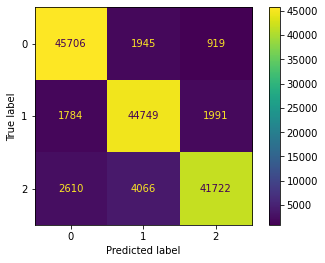

In [125]:
ada=AdaBoostClassifier()
clf4=ada.fit(X_train,y_train)
y_pred=clf4.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))


NAIVE BYES:-
accuracy: 0.8992865587111318
,recall: 0.8992865587111318
,f1-score: 0.8988015000127976
,precision: 0.9081139702275913
LOGGISTIC :-accuracy: 0.9084829406427845
,recall: 0.9084829406427845
,f1-score: 0.9082935176131418
,precision: 0.9095375176588235
DECISION TREE:-accuracy: 0.87748467269678
,recall: 0.87748467269675
,f1-score: 0.87735676108388
,precision: 0.8778654896630
RANDOM FOREST:-accuracy: 0.9795315206334
,recall: 0.9795315206334
,f1-score: 0.979449345425
,precision: 0.9797251295525
ADA BOOST:-accuracy: 0.6627924559425947
,recall: 0.6627924559425947
,f1-score: 0.6604988647303149
,precision: 0.6615292203531358

# Observation:- we get to know that the Model 2 :-LogisticRegression gives the highest values 
accuracy: 0.9084829406427845
recall: 0.9084829406427845
f1-score: 0.9082935176131418
precision: 0.9095375176588235
    so,Model 2 is best fit model for our BALANCE DataSet

**FINAL CONCLUSION **

IMBALANCE DATASETS LOGISTIC REGRESSION MODEL VALUES:-
accuracy: 0.9069767441860465
recall: 0.9069767441860465
f1-score: 0.889477614208318
precision: 0.8893875929222128

BALANCE DATASETS LOGISTIC REGRESSION MODEL VALUES:-
accuracy: 0.9084829406427845
recall: 0.9084829406427845
f1-score: 0.9082935176131418
precision: 0.9095375176588235

SO THERE IS NOT THAT MUCH DIFFERENCE BETWEEN THE BALANCE AND INBALANCE DATA LOGISTIC MODEL


In [ ]:
gvu ufytfyt fyfyu f yd

****

# NOW, On the Base Of Our Model We will Predict our  Future Sentiments 

In [127]:
def sentimeny1(f):
    if f['Prediction'] == 0 :
        value = 'Negative'
    elif f['Prediction'] == 1:
      value = 'Neutral'
    else:
        value = 'Positive'
    return value

In [132]:
clf=lr.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     48570
           1       0.89      0.92      0.90     48524
           2       0.94      0.86      0.90     48398

    accuracy                           0.91    145492
   macro avg       0.91      0.91      0.91    145492
weighted avg       0.91      0.91      0.91    145492



In [133]:
x=vectorizer.transform(df.review)  

In [134]:
df['Prediction']=clf.predict(x)
df.head()

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,sentiment,Prediction
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Positive,2
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Neutral,1
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Positive,2
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Positive,2
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Positive,2


In [135]:
df['Prediction']=df.apply(sentimeny1,axis=1)
df['Prediction'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [136]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,sentiment,Prediction
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Positive,Positive
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Neutral,Neutral
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Positive,Positive
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Positive,Positive
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Positive,Positive


# Seprating the Sentiments

In [137]:
review_pos = df[(df.Prediction=='Positive')&(df.sentiment=='Positive')]
review_neg = df[(df.Prediction=='Negative')&(df.sentiment=='Negative')]
review_neu = df[(df.Prediction=='Neutral')&(df.sentiment=='Neutral')]

In [138]:
print('Positive reviews:',review_pos.shape[0])
print('Negative reviews:',review_neg.shape[0])
print('Neutral reviews:',review_neu.shape[0])

Positive reviews: 142049
Negative reviews: 10026
Neutral reviews: 10359


NOW WE WILL SEE THE TOP 3 POSITIVE,NEGATIVE & NEUTRAL REVIEW BRANDS

In [140]:
positive=review_pos.groupby('brand').mean()
negative=review_neg.groupby('brand').mean()
neutral=review_neu.groupby('brand').mean()

TOP3 POSITIVE:-

In [141]:
positive.sort_values('overall',ascending=False).head(3)

,overall,verified,price
brand,,,
yueton,5.0,1.000000,6.99
Boomwhackers,5.0,1.000000,9.99
Timber Drum,5.0,0.857143,0.91


MOST COMMON WORDS USED IN REVIEW

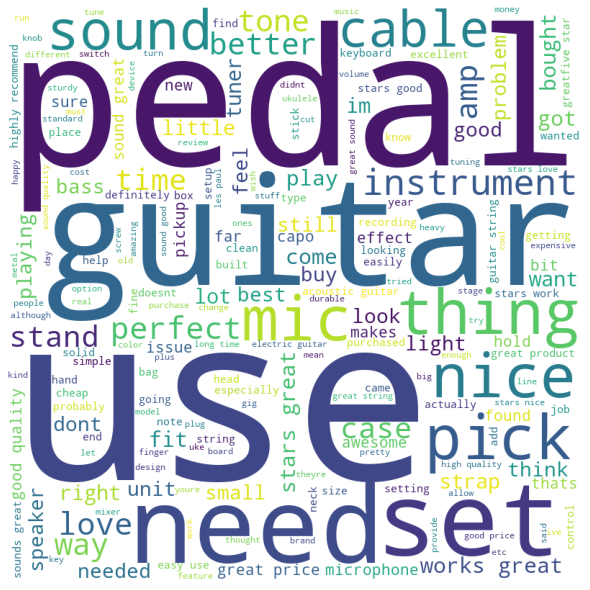

In [142]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 

# iterate through the csv file
for val in review_pos.review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

TOP3 NEGATIVE :-

In [143]:
negative.sort_values('overall',ascending=False).head(3)

,overall,verified,price
brand,,,
LR Baggs,2.0,1.0,67.285
G Ganen,2.0,0.0,12.990
Gemeinhardt,2.0,1.0,94.490


MOST COMMON WORDS USED FOR NEGATIVE REVIEW

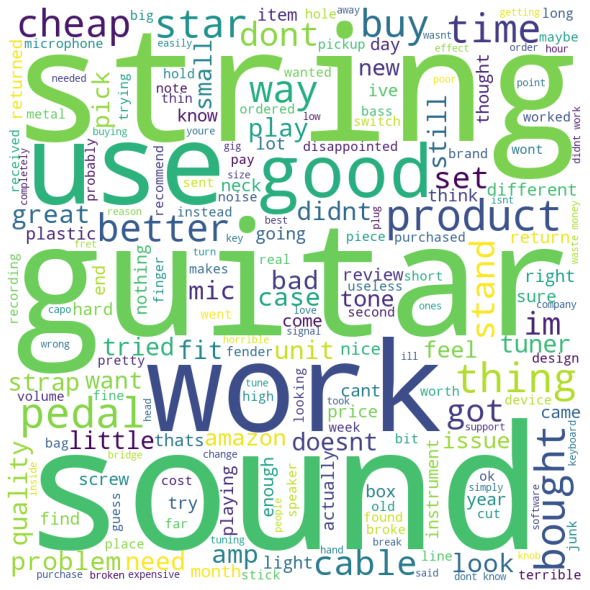

In [144]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 

# iterate through the csv file
for val in review_neg.review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

TOP3 NEUTRAL :-

In [145]:
neutral.sort_values('overall',ascending=False).head(3)

,overall,verified,price
brand,,,
,3.0,1.0,15.896667
Pykmax,3.0,1.0,6.990000
Pick Punch,3.0,0.5,1.960000


MOST COMMON WORD USE FOR NEUTRAL REVIEWS:=

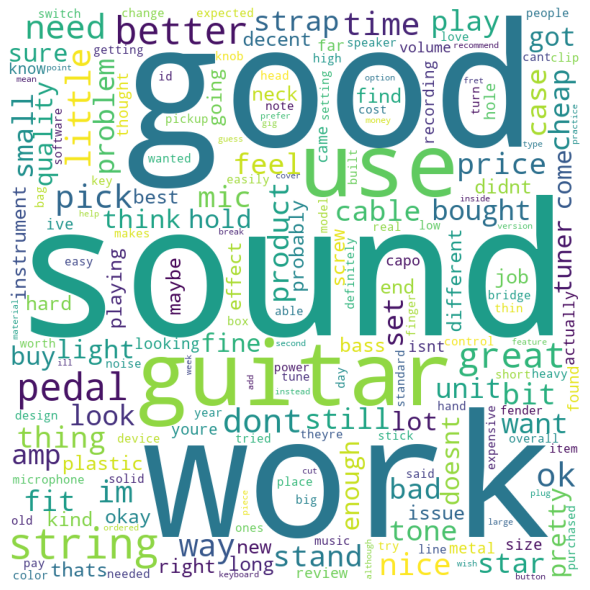

In [146]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 

# iterate through the csv file
for val in review_neu.review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [147]:
print('Positive reviews:')
display(review_pos.head(3))
print('\nNegative reviews:')
display(review_neg.head(3))
print('\nNeutral reviews:')
display(review_neu.head(3))

Positive reviews:


,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,sentiment,Prediction
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Positive,Positive
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Positive,Positive
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Positive,Positive



Negative reviews:


,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,sentiment,Prediction
9,1.0,True,2016-02-21,A2053ZJUGCKUA5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,not likesent refundone star,Negative,Negative
11,1.0,True,2015-04-28,A3NPETMZXGIG65,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,wanted love product badly debated tirelessly p...,Negative,Negative
15,1.0,True,2014-12-29,A369Z7YAOPM5JH,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,not waste money not near waste time money effo...,Negative,Negative



Neutral reviews:


,overall,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,sentiment,Prediction
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Neutral,Neutral
5,3.0,True,2016-06-30,A3OULY1DYPR5R8,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,returned ok music ole ole lessons persist youl...,Neutral,Neutral
8,3.0,True,2016-02-29,A3DMRLRVT0KRTE,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,ok learning does not great contact strings ok ...,Neutral,Neutral



# Clustering

In [148]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [149]:
### Brand with positive sentiment

In [150]:
df_brand_pos=review_pos['brand']
df_brand_pos.head()

0    ChordBuddy
2    ChordBuddy
3    ChordBuddy
4    ChordBuddy
6    ChordBuddy
Name: brand, dtype: object

In [151]:
### Brands with negative sentiment

In [152]:
df_brand_neg=review_neg['brand']
df_brand_neg.head()

9     ChordBuddy
11    ChordBuddy
15    ChordBuddy
16    ChordBuddy
18    ChordBuddy
Name: brand, dtype: object

In [153]:
### Brand with neutral sentiment

In [154]:
df_brand_neu=review_neu['brand']
df_brand_neu.head()

1     ChordBuddy
5     ChordBuddy
8     ChordBuddy
13    ChordBuddy
26    ChordBuddy
Name: brand, dtype: object

In [155]:
df_brand=df.groupby(by='brand').mean()

In [156]:
df_brand

,overall,verified,price
brand,,,
,4.117021,0.957447,14.316489
1To1Music,4.531915,0.978723,8.541489
32 Key Melodica,4.777778,0.833333,0.910000
920D Custom,4.843750,0.937500,7.620625
@ Ohana,4.600000,0.400000,26.240000
...,...,...,...
wmm,4.333333,1.000000,15.990000
wonsung,4.750000,1.000000,13.990000
xGuitarx,4.677966,0.949153,11.754068


# Feature engineering

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
encoder = LabelEncoder()

df_brand['brand_label'] = encoder.fit_transform(df_brand['verified'])
df_brand.head()

,overall,verified,price,brand_label
brand,,,,
,4.117021,0.957447,14.316489,394
1To1Music,4.531915,0.978723,8.541489,451
32 Key Melodica,4.777778,0.833333,0.910000,120
920D Custom,4.843750,0.937500,7.620625,339
@ Ohana,4.600000,0.400000,26.240000,9


In [159]:
df_brand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries,  to yueton
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   overall      1316 non-null   float64
 1   verified     1316 non-null   float64
 2   price        1316 non-null   float64
 3   brand_label  1316 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 51.4+ KB


In [160]:
df_brand

,overall,verified,price,brand_label
brand,,,,
,4.117021,0.957447,14.316489,394
1To1Music,4.531915,0.978723,8.541489,451
32 Key Melodica,4.777778,0.833333,0.910000,120
920D Custom,4.843750,0.937500,7.620625,339
@ Ohana,4.600000,0.400000,26.240000,9
...,...,...,...,...
wmm,4.333333,1.000000,15.990000,471
wonsung,4.750000,1.000000,13.990000,471
xGuitarx,4.677966,0.949153,11.754068,373


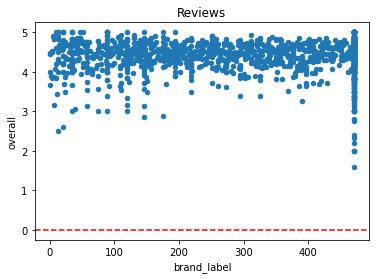

In [161]:
df_brand.plot.scatter(x='brand_label',y='overall')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title('Reviews')
plt.show()

# Feature scaling

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

df_num = df_brand.select_dtypes('number')
df_num_scaled = scaler.fit_transform(df_num)

In [164]:
df_num_scaled

array([[-0.64064586,  0.47410912, -0.31018599,  0.64893116],
       [ 0.34044187,  0.636792  , -0.48445382,  1.00749554],
       [ 0.9218272 , -0.47487433, -0.71474354, -1.0746941 ],
       ...,
       [ 0.68580522,  0.41069037, -0.38751026,  0.5168285 ],
       [-5.64670894,  0.79947488, -0.13898072,  1.1333076 ],
       [ 1.44731009,  0.79947488, -0.53127195,  1.1333076 ]])

# Modelling

In [165]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score

# __KMeans__

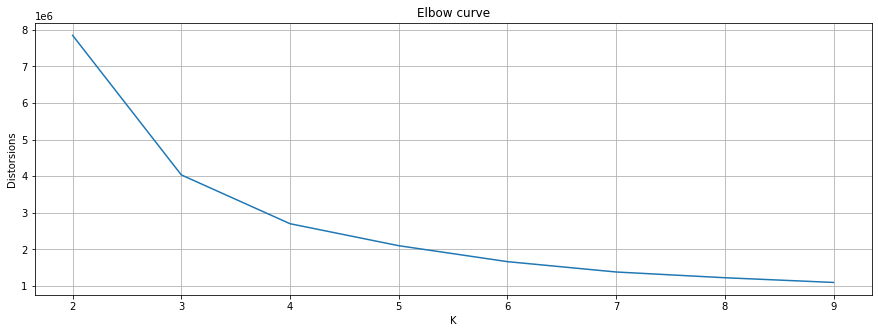

In [166]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_brand)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');


In [167]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7]


For n_clusters = 2 The average silhouette_score is : 0.6589383890917058
For n_clusters = 3 The average silhouette_score is : 0.5991222678213641
For n_clusters = 4 The average silhouette_score is : 0.5629087798052844
For n_clusters = 5 The average silhouette_score is : 0.5407148101488043
For n_clusters = 6 The average silhouette_score is : 0.5510548815071902
For n_clusters = 7 The average silhouette_score is : 0.5335826158104126


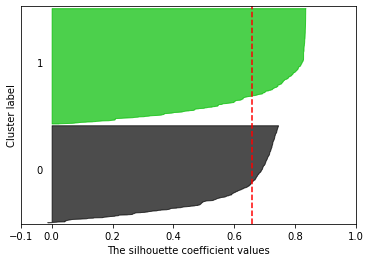

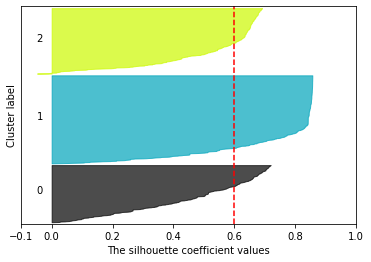

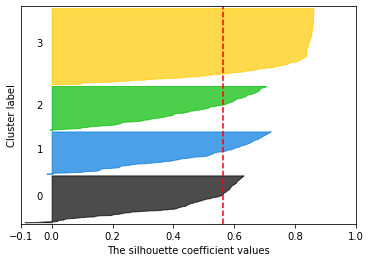

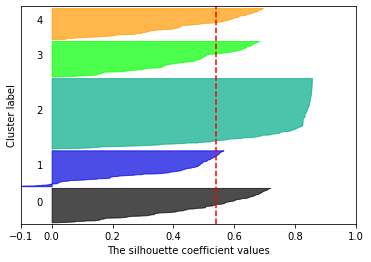

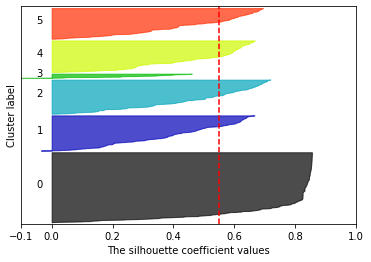

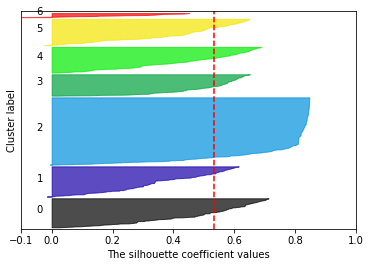

In [168]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_brand) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_brand)

    silhouette_avg = silhouette_score(df_brand, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_brand, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [169]:
kmeans = KMeans(n_clusters=2, random_state=800)
y_kmeans = kmeans.fit_predict(df_num_scaled)

df_pred=pd.DataFrame(df_num_scaled,columns=df_num.columns)
df_pred['k_pred']=y_kmeans

df_pred['k_pred'].replace({0:'Positive',1:'Negative',2:'Neutral'},inplace=True)

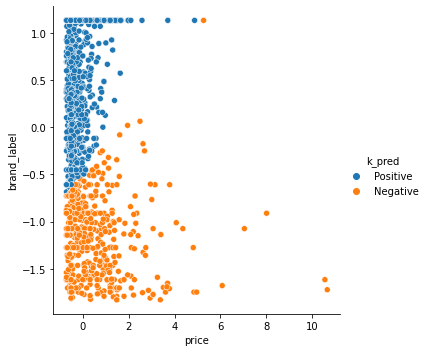

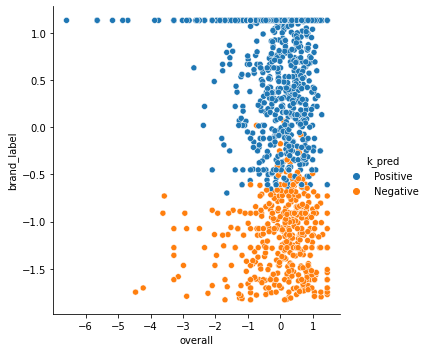

In [170]:
sns.relplot(data=df_pred,x='price',y='brand_label',hue='k_pred')
sns.relplot(data=df_pred,x='overall',y='brand_label',hue='k_pred')

In [171]:
df_pred.head()

,overall,verified,price,brand_label,k_pred
0,-0.640646,0.474109,-0.310186,0.648931,Positive
1,0.340442,0.636792,-0.484454,1.007496,Positive
2,0.921827,-0.474874,-0.714744,-1.074694,Negative
3,1.077830,0.321594,-0.512242,0.302948,Positive
4,0.501441,-3.788182,0.049621,-1.772951,Negative


# __Agglomerative Clustering__

Text(0.5, 1.0, 'Dendrogram')

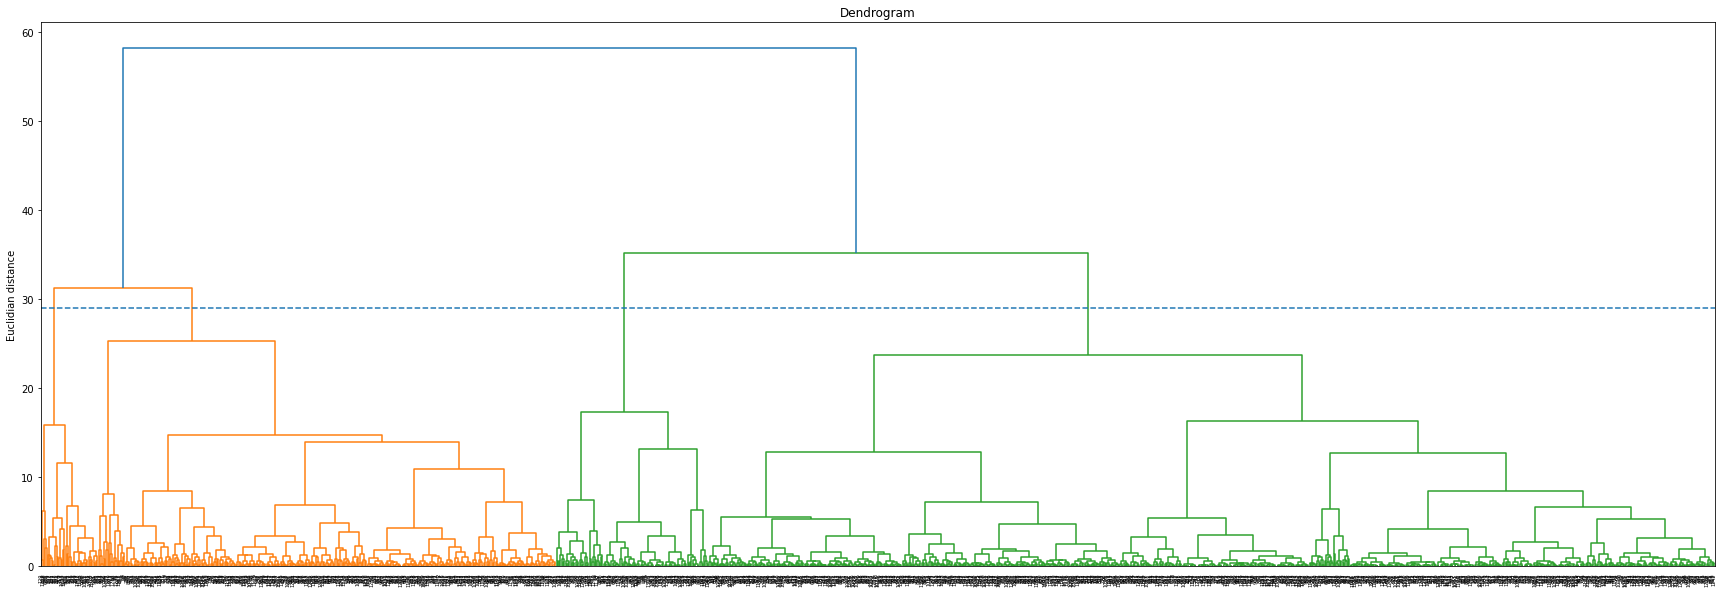

In [172]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(df_num_scaled,method='ward'))

ax = plt.gca()
ax.tick_params(axis='x',which='major')

plt.axhline(y=29,linestyle='--')

plt.ylabel('Euclidian distance')
plt.title('Dendrogram')

In [173]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_num_scaled)


In [174]:
y_hc 

array([0, 0, 3, ..., 0, 2, 0])

In [175]:
df_pred['hc_pred'] = y_hc

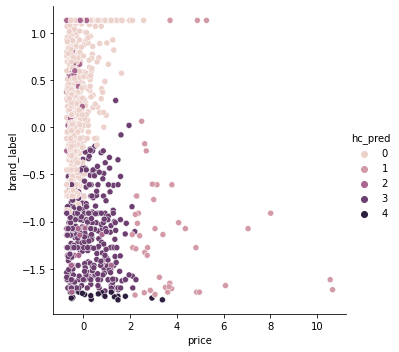

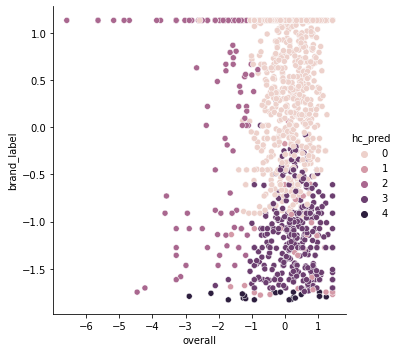

In [176]:
sns.relplot(data=df_pred,x='price',y='brand_label',hue='hc_pred')
sns.relplot(data=df_pred,x='overall',y='brand_label',hue='hc_pred')

In [177]:
silhouette_score(df_num_scaled,y_hc )

0.3530870550880767

# __DBSCAN__

In [178]:
from sklearn.cluster import DBSCAN 
knn = NearestNeighbors(n_neighbors=2)
neighbors = knn.fit(df_num_scaled)
distances, indices = neighbors.kneighbors(df_num_scaled)

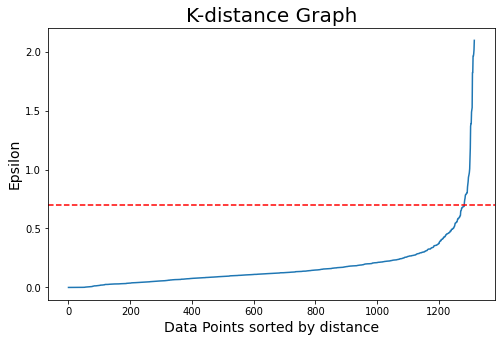

In [179]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)

plt.axhline(y=0.7, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [180]:
eps = 0.8
for min_samples in range(2,50,2):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df_num_scaled)

    X = cluster_labels + 2
    y = np.bincount(X)
    i = np.nonzero(y)[0]
    results = list(zip(i,y[i]) )
    print('eps =',eps,'min_samples =', min_samples)
    print('obtained clusters:', results)
    print('###'*10)

eps = 0.8 min_samples = 2
obtained clusters: [(1, 25), (2, 1257), (3, 8), (4, 3), (5, 2), (6, 4), (7, 2), (8, 6), (9, 2), (10, 2), (11, 3), (12, 2)]
##############################
eps = 0.8 min_samples = 4
obtained clusters: [(1, 49), (2, 1253), (3, 8), (4, 6)]
##############################
eps = 0.8 min_samples = 6
obtained clusters: [(1, 54), (2, 1250), (3, 6), (4, 6)]
##############################
eps = 0.8 min_samples = 8
obtained clusters: [(1, 70), (2, 1246)]
##############################
eps = 0.8 min_samples = 10
obtained clusters: [(1, 72), (2, 1244)]
##############################
eps = 0.8 min_samples = 12
obtained clusters: [(1, 80), (2, 1236)]
##############################
eps = 0.8 min_samples = 14
obtained clusters: [(1, 98), (2, 1218)]
##############################
eps = 0.8 min_samples = 16
obtained clusters: [(1, 109), (2, 1207)]
##############################
eps = 0.8 min_samples = 18
obtained clusters: [(1, 110), (2, 1206)]
##############################
eps =

In [181]:
eps = 0.8; min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_dbscan = dbscan.fit_predict(df_num_scaled)

df_pred['dbscan_pred'] = y_dbscan

In [182]:
df_pred['k_pred'].replace({'Positive':0,'Negative':1,'Neutral':2},inplace=True)
df_pred[['brand_label','k_pred','hc_pred','dbscan_pred']]

,brand_label,k_pred,hc_pred,dbscan_pred
0,0.648931,0,0,0
1,1.007496,0,0,0
2,-1.074694,1,3,0
3,0.302948,0,0,0
4,-1.772951,1,4,-1
...,...,...,...,...
1311,1.133308,0,0,0
1312,1.133308,0,0,0
1313,0.516828,0,0,0
1314,1.133308,0,2,2


In [183]:
sil_kmeans = silhouette_score(df_num_scaled,y_kmeans)
sil_hc = silhouette_score(df_num_scaled,y_hc)
sil_dbscan = silhouette_score(df_num_scaled,y_dbscan)

print('Silhouette score:')
print('Kmeans: {:.3f}'.format(sil_kmeans))
print('AgglomerativeClustering: {:.3f}'.format(sil_hc))
print('DBSCAN: {:.3f}'.format(sil_dbscan))

Silhouette score:
Kmeans: 0.387
AgglomerativeClustering: 0.353
DBSCAN: 0.444


# conclusion:

By comparision of all the clustring algorithm we got to new that the the Silhouette score of kmeans is 0.387 and of AgglomerativeClustering is 0.353 and of DBSCANis  0.444 and it shows that the Silhouette score of DBSCAN is high so on the amazon dataset the DBSCAN clustring will be the best.